<a href="https://colab.research.google.com/github/AnujKrishnaPhuyal/DeepLearning-Practices/blob/main/civil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = '/content/road_data.csv'

In [ ]:
import pandas as pd
from matplotlib.colors import ListedColormap
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('road_data.csv')

In [ ]:
df.head(10)

,Unnamed: 0,ID,a,DS,Lane,y,RLV,Driver Behaviour,v
0,0,676,-0.664340,15.354684,1,1,No,Normal,27.537272
1,1,698,-0.435845,67.143053,1,1,No,AP,34.054511
2,2,743,0.170864,85.338603,1,0,No,Normal,29.211065
3,3,1862,0.119444,41.961064,1,1,No,Normal,39.489852
4,4,1885,0.000000,80.823385,2,1,No,AP,40.345775
5,5,2985,0.426487,30.320449,1,1,No,Normal,29.500287
6,6,4343,-1.294951,4.624121,2,1,No,Normal,32.409627
7,7,4349,0.002208,23.107041,1,1,No,Normal,34.446508
8,8,4366,0.448625,77.565538,1,1,No,AP,35.650107
9,9,4378,0.497717,84.326734,1,1,Yes,AP,35.198288


In [ ]:
df_selected = df.loc[:, ['v', 'DS', 'y']]


In [ ]:
df_selected.head()

,v,DS,y
0,27.537272,15.354684,1
1,34.054511,67.143053,1
2,29.211065,85.338603,0
3,39.489852,41.961064,1
4,40.345775,80.823385,1


<ipython-input-132-c652abb7b562>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df_selected['v'], df_selected['DS'], c=colors, cmap=custom_cmap, marker='^')


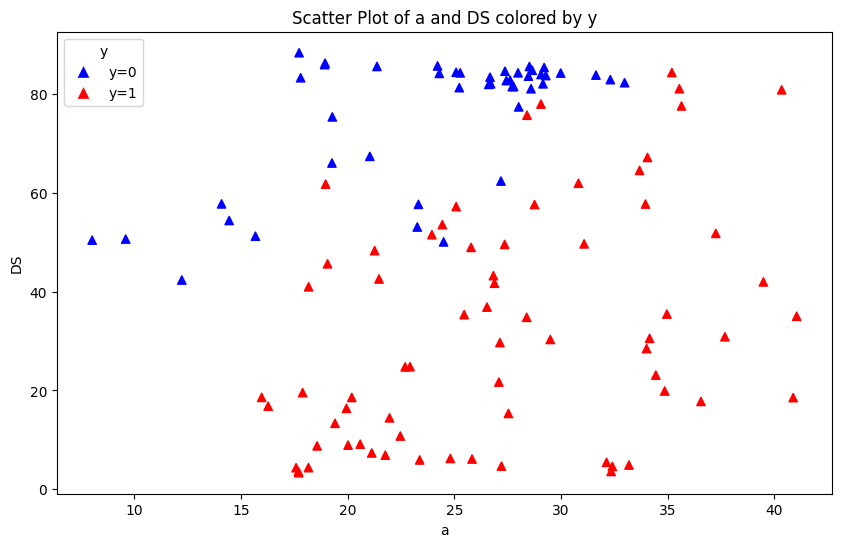

In [ ]:

# Mapping y values to colors
colors = df_selected['y'].map({0: 'blue', 1: 'red'})

# Define custom colormap
custom_cmap = ListedColormap(['blue', 'red'])

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(df_selected['v'], df_selected['DS'], c=colors, cmap=custom_cmap, marker='^')

# Adding labels and title
plt.xlabel('a')
plt.ylabel('DS')
plt.title('Scatter Plot of a and DS colored by y')

# # Adding color bar with custom ticks and labels
# cbar = plt.colorbar(scatter, ticks=[0, 1])
# cbar.set_ticklabels(['y=0', 'y=1'])
# cbar.set_label('y')

# Creating custom legend
handles = [
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='blue', markersize=10, label='y=0'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markersize=10, label='y=1')
]
plt.legend(title='y', handles=handles)

# Showing the plot
plt.show()

In [ ]:
# Splitting the data into features (X) and labels (y)
X = df_selected[['v', 'DS']].values
y = df_selected['y'].values

In [ ]:
X,y

(array([[27.537272  , 15.354684  ],
        [34.054511  , 67.143053  ],
        [29.211065  , 85.338603  ],
        [39.4898515 , 41.961064  ],
        [40.3457749 , 80.823385  ],
        [29.5002875 , 30.320449  ],
        [32.409627  ,  4.624121  ],
        [34.446508  , 23.107041  ],
        [35.6501067 , 77.565538  ],
        [35.1982876 , 84.326734  ],
        [28.3935843 , 34.801603  ],
        [23.26459487, 53.071359  ],
        [33.9614215 , 57.720356  ],
        [36.563208  , 17.782314  ],
        [29.988316  , 84.224467  ],
        [28.5966598 , 81.041726  ],
        [27.0891426 , 21.698633  ],
        [19.281181  , 75.351073  ],
        [23.3766859 ,  5.941066  ],
        [27.3590215 , 49.549027  ],
        [27.9885    , 84.261157  ],
        [19.945143  , 16.379083  ],
        [28.408234  , 75.688937  ],
        [21.375682  , 85.558669  ],
        [17.692631  ,  3.579014  ],
        [22.6943976 , 24.767028  ],
        [24.497606  , 50.056462  ],
        [27.718731  , 81.481

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Converting to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Reshape y to be a column vector

In [ ]:
X_tensor, y_tensor

(tensor([[ 2.3404e-01, -1.1727e+00],
         [ 1.2027e+00,  6.0377e-01],
         [ 4.8282e-01,  1.2279e+00],
         [ 2.0106e+00, -2.6006e-01],
         [ 2.1378e+00,  1.0731e+00],
         [ 5.2581e-01, -6.5937e-01],
         [ 9.5824e-01, -1.5408e+00],
         [ 1.2610e+00, -9.0682e-01],
         [ 1.4399e+00,  9.6130e-01],
         [ 1.3727e+00,  1.1932e+00],
         [ 3.6131e-01, -5.0565e-01],
         [-4.0104e-01,  1.2107e-01],
         [ 1.1889e+00,  2.8054e-01],
         [ 1.5756e+00, -1.0895e+00],
         [ 5.9835e-01,  1.1897e+00],
         [ 3.9150e-01,  1.0805e+00],
         [ 1.6743e-01, -9.5513e-01],
         [-9.9312e-01,  8.8534e-01],
         [-3.8438e-01, -1.4957e+00],
         [ 2.0754e-01,  2.3677e-04],
         [ 3.0110e-01,  1.1910e+00],
         [-8.9443e-01, -1.1376e+00],
         [ 3.6349e-01,  8.9693e-01],
         [-6.8180e-01,  1.2355e+00],
         [-1.2292e+00, -1.5767e+00],
         [-4.8579e-01, -8.4987e-01],
         [-2.1777e-01,  1.7644e-02],
 

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [ ]:
len(X_train),len(y_train)

(91, 91)

In [ ]:
len(X_test),len(y_test)

(23, 23)

In [ ]:
X_train.shape,y_train.shape

(torch.Size([91, 2]), torch.Size([91, 1]))

In [ ]:
# Creating DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [ ]:
train_dataset[9]

(tensor([34.0130, 28.4702]), tensor([1.]))

In [ ]:
from torch import nn

class simple_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Adding Sigmoid activation

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.sigmoid(self.layer_3(x))  # Applying Sigmoid activation at the end
        return x

In [ ]:
model_1=simple_cnn()


In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0519,  0.2610],
                      [-0.0565, -0.2569],
                      [-0.5148, -0.1346],
                      [-0.5972,  0.4837],
                      [ 0.1007,  0.2835],
                      [ 0.2109,  0.4194],
                      [-0.6144, -0.1223],
                      [ 0.1277, -0.1738],
                      [-0.5831,  0.3649],
                      [ 0.5661,  0.4179]])),
             ('layer_1.bias',
              tensor([-0.5630,  0.2945, -0.1594, -0.6525, -0.6625,  0.0048, -0.5101, -0.0289,
                       0.1716,  0.3674])),
             ('layer_2.weight',
              tensor([[-0.2552, -0.1995,  0.1405,  0.2415, -0.2224,  0.1004,  0.0270,  0.2190,
                        0.3124, -0.3068],
                      [ 0.2294, -0.0768,  0.1455, -0.0329,  0.3102, -0.3086,  0.0684, -0.1142,
                       -0.1439, -0.0648],
                      [-0.0078, -0.2433,  0.0727, -0.0658, -0.0610,  0.2

In [ ]:
model_1

simple_cnn(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [ ]:
import torch.optim as optim

loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model_1.parameters(), lr=0.01)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
epochs=1000
loss_train=[]
loss_test=[]
for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train)
  y_pred = torch.round(y_logits)
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
        test_logits = model_1(X_test)
        test_pred = torch.round(test_logits)
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        loss_train.append(loss.detach().numpy())
        loss_test.append(test_loss.detach().numpy())


  if epoch%100 ==0:
    print(f"Epoch:{epoch},train_loss:{loss:.3f},test_loss:{test_loss:.3f},train_accuracy:{acc:.3f},test_acc:{test_acc:.3f}")


Epoch:0,train_loss:2.989,test_loss:1.134,train_accuracy:57.143,test_acc:73.913
Epoch:100,train_loss:0.152,test_loss:0.196,train_accuracy:94.505,test_acc:91.304
Epoch:200,train_loss:0.144,test_loss:0.226,train_accuracy:94.505,test_acc:91.304
Epoch:300,train_loss:0.142,test_loss:0.231,train_accuracy:94.505,test_acc:91.304
Epoch:400,train_loss:0.141,test_loss:0.234,train_accuracy:94.505,test_acc:91.304
Epoch:500,train_loss:0.141,test_loss:0.238,train_accuracy:94.505,test_acc:91.304
Epoch:600,train_loss:0.140,test_loss:0.241,train_accuracy:94.505,test_acc:91.304
Epoch:700,train_loss:0.140,test_loss:0.245,train_accuracy:94.505,test_acc:91.304
Epoch:800,train_loss:0.140,test_loss:0.247,train_accuracy:94.505,test_acc:91.304
Epoch:900,train_loss:0.140,test_loss:0.249,train_accuracy:94.505,test_acc:91.304


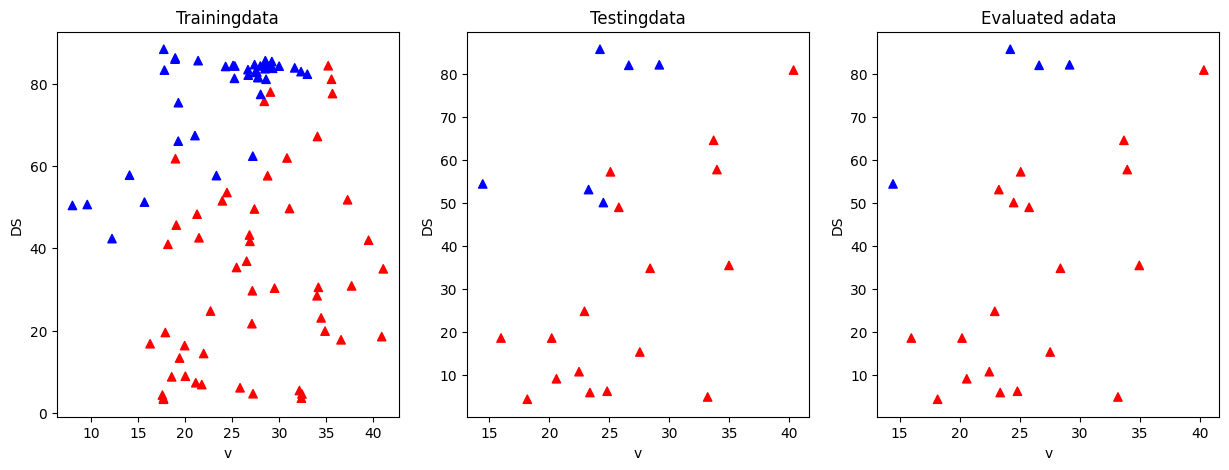

In [ ]:
model_1.eval()
with torch.inference_mode():
   test_logits = model_1(X_test)
   y_pred = torch.round(test_logits)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Trainingdata")
plt.xlabel('v')
plt.ylabel('DS')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, cmap='bwr', marker='^')

plt.subplot(1,3,2)
plt.title("Testingdata")
plt.xlabel('v')
plt.ylabel('DS')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,  cmap='bwr',marker='^')

plt.subplot(1,3,3)
plt.title("Evaluated adata")
plt.xlabel('v')
plt.ylabel('DS')
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,  cmap='bwr',marker='^')
plt.show()

In [ ]:
model_1.eval()
with torch.no_grad():
  predicted_values = model_1(X_test)
  print(f"predicted:{predicted_values}, real_values:{y_test}")


predicted:tensor([[0.9996],
        [0.9831],
        [0.9868],
        [0.9902],
        [0.9999],
        [0.8619],
        [0.0252],
        [0.0903],
        [0.9997],
        [0.8696],
        [0.9979],
        [0.9999],
        [0.0386],
        [0.9997],
        [0.9994],
        [0.9999],
        [0.0027],
        [0.9656],
        [0.9988],
        [1.0000],
        [0.9999],
        [0.9994],
        [0.9985]]), real_values:tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [ ]:
import numpy as np

In [ ]:
lower_threshold = np.percentile(predicted_values,10)
upper_threshold = np.percentile(predicted_values,90)

print(lower_threshold, upper_threshold)

0.04892517775297166 0.9999118566513061


In [ ]:
low_risk =predicted_values[(predicted_values <lower_threshold)]
high_risk =predicted_values[( predicted_values >upper_threshold)]
medium_risk = predicted_values[(predicted_values >= lower_threshold) & (predicted_values <= upper_threshold)]

print(low_risk, high_risk,medium_risk)

tensor([0.0252, 0.0386, 0.0027]) tensor([0.9999, 0.9999, 1.0000]) tensor([0.9996, 0.9831, 0.9868, 0.9902, 0.8619, 0.0903, 0.9997, 0.8696, 0.9979,
        0.9999, 0.9997, 0.9994, 0.9656, 0.9988, 0.9999, 0.9994, 0.9985])


In [ ]:
# Separate medium_risk based on condition
medium_risk_blue = medium_risk[medium_risk < 0.5]
medium_risk_red = medium_risk[medium_risk >= 0.5]

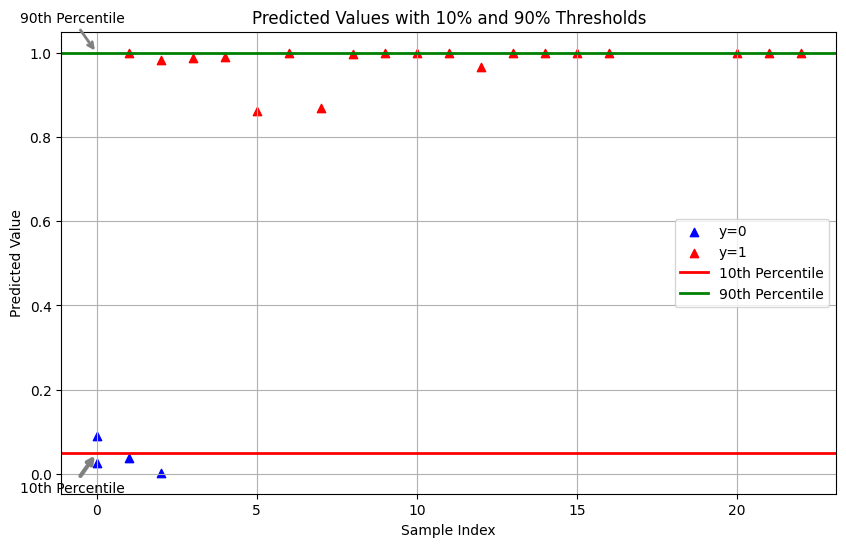

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))


# Plot points for medium_risk < 0.5 in blue
plt.scatter(range(len(medium_risk_blue)), medium_risk_blue, color='blue', label="y=0", marker="^")

# Plot points for medium_risk >= 0.5 in red
plt.scatter(range(len(medium_risk_blue), len(medium_risk_blue) + len(medium_risk_red)), medium_risk_red, color='red', label='y=1', marker="^")



# Plot points for below 10% in blue
plt.scatter(range(len(low_risk)), low_risk, color='blue', marker="^")

# # Plot points for between 10% and 90% in gray
# plt.scatter(range(len(low_risk), len(low_risk) + len(medium_risk)), medium_risk, color='gray', label='Between 10% and 90%')

# Plot points for above 90% in red
plt.scatter(range(len(low_risk) + len(medium_risk), len(low_risk) + len(medium_risk) + len(high_risk)), high_risk, color='red', marker="^")

# Add vertical lines for thresholds
plt.axhline(y=lower_threshold, color='r', linestyle='-', linewidth=2, label='10th Percentile')

plt.axhline(y=upper_threshold, color='g', linestyle='-', linewidth=2, label='90th Percentile')


# Annotate the 10th  and 90th percentile line with an arrow
plt.annotate('10th Percentile', xy=(0, lower_threshold), xytext=(20, -20),
             textcoords='offset points', ha='right', va='top',
             arrowprops=dict(arrowstyle='->', color='grey', linewidth=3))
plt.annotate('90th Percentile', xy=(0, upper_threshold), xytext=(20, 20),
             textcoords='offset points', ha='right', va='bottom',
             arrowprops=dict(arrowstyle='->', color='grey', linewidth=2))


plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values with 10% and 90% Thresholds')
plt.legend()
plt.grid(True)
plt.show()